In [ ]:
# x가 1~50까지 1씩 증가할때, y = 3x+4+(난수)인 x,y를 torch.tensor로 생성하고
# 이 데이터를 가지고 학습하는 파이토치 모델 생성

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Generate x values from 1 to 50
x = torch.arange(1, 51).float()

# manual_seed(1)을 넣으면 항상 동일한 난수가 생성
torch.manual_seed(100)
# Generate random noise
noise = torch.randn(50)

# Calculate y values using the equation y = 3x + 4 + noise
y = 3 * x + 4 + noise

In [ ]:
x[:5],y[:5],noise[:5]

(tensor([1., 2., 3., 4., 5.]),
 tensor([ 7.1268, 11.3564, 13.5632, 15.8961, 18.6425]),
 tensor([ 0.1268,  1.3564,  0.5632, -0.1039, -0.3575]))

In [ ]:
x.ndim,y.ndim, noise.ndim

(1, 1, 1)

In [ ]:
# 50행 데이터를 50행 1열 데이터로 차원 변경
y1=y.reshape(-1,1)


# Reshape x to a column vector
x1 = x.unsqueeze(1)

# -1의 의미는 행의 갯수는 지정하지 않고, 열의 갯수를 1로 설정
# 차원 변환 1차원->2차원
x2 = x.reshape(-1,1)

torch.Size([50])
torch.Size([50])


In [ ]:
print(x.shape)
print(y.shape)

print(x1.shape)
print(y1.shape)

torch.Size([50])
torch.Size([50])
torch.Size([50, 1])
torch.Size([50, 1])


In [ ]:
# Define a simple linear model
# 레이어 하나를 구현
# 1. 모델 설정(구현)
model = nn.Linear(1, 1)

# Define loss function and optimizer
# 2. 손실함수 정의
criterion = nn.MSELoss()

# 3. optimizer를 정의
optimizer = optim.SGD(model.parameters(), lr=0.001)

epoch_list = []
loss_list =[]
# 4. 하이퍼 파라메터 설정
# 1 epoch은 주어진 훈련 데이터를 한번 다 소진 하면
epochs = 2000

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x1)

    # Compute loss
    loss = criterion(y_pred, y1)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    if (epoch + 1) % 10 == 0:
        epoch_list.append(epoch)
        loss_list.append(loss.item())

Epoch [50/2000], Loss: 5.7835
Epoch [100/2000], Loss: 5.5623
Epoch [150/2000], Loss: 5.3516
Epoch [200/2000], Loss: 5.1509
Epoch [250/2000], Loss: 4.9597
Epoch [300/2000], Loss: 4.7775
Epoch [350/2000], Loss: 4.6040
Epoch [400/2000], Loss: 4.4387
Epoch [450/2000], Loss: 4.2811
Epoch [500/2000], Loss: 4.1311
Epoch [550/2000], Loss: 3.9881
Epoch [600/2000], Loss: 3.8520
Epoch [650/2000], Loss: 3.7222
Epoch [700/2000], Loss: 3.5986
Epoch [750/2000], Loss: 3.4808
Epoch [800/2000], Loss: 3.3687
Epoch [850/2000], Loss: 3.2618
Epoch [900/2000], Loss: 3.1600
Epoch [950/2000], Loss: 3.0630
Epoch [1000/2000], Loss: 2.9706
Epoch [1050/2000], Loss: 2.8826
Epoch [1100/2000], Loss: 2.7987
Epoch [1150/2000], Loss: 2.7188
Epoch [1200/2000], Loss: 2.6427
Epoch [1250/2000], Loss: 2.5702
Epoch [1300/2000], Loss: 2.5011
Epoch [1350/2000], Loss: 2.4353
Epoch [1400/2000], Loss: 2.3726
Epoch [1450/2000], Loss: 2.3129
Epoch [1500/2000], Loss: 2.2560
Epoch [1550/2000], Loss: 2.2018
Epoch [1600/2000], Loss: 2.1

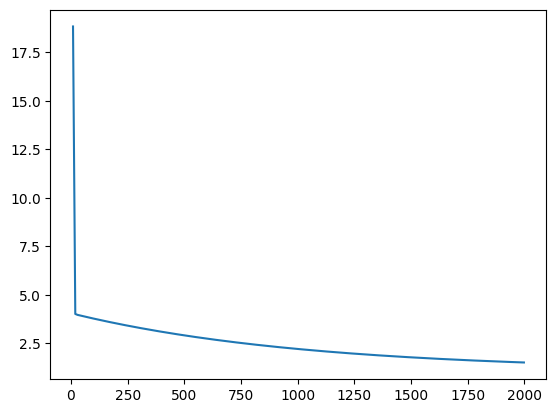

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, loss_list)
plt.show()

# **Kaggle Salary 데이터셋을 사용한 모델 학습**

In [ ]:
import torch
import pandas as pd
import numpy as np

# CSV 파일 불러오기 (예: 'data.csv' 파일)
csv_file = '/content/Salary.csv'
data = pd.read_csv(csv_file)

# Pandas DataFrame에서 NumPy 배열로 변환
data_numpy = data.to_numpy()

# NumPy 배열에서 PyTorch Tensor로 변환
data_tensor = torch.tensor(data_numpy, dtype=torch.float32)

print("NumPy 배열:\n", data_numpy.shape)
print("\nPyTorch 텐서:\n", data_tensor.shape)


NumPy 배열:
 (35, 2)

PyTorch 텐서:
 torch.Size([35, 2])


In [ ]:
x = data_tensor[:,0].reshape(-1,1)
y = data_tensor[:,1].reshape(-1,1)
print(x,y)

tensor([[ 1.1000],
        [ 1.3000],
        [ 1.5000],
        [ 2.0000],
        [ 2.2000],
        [ 2.9000],
        [ 3.0000],
        [ 3.2000],
        [ 3.2000],
        [ 3.7000],
        [ 3.9000],
        [ 4.0000],
        [ 4.0000],
        [ 4.1000],
        [ 4.5000],
        [ 4.9000],
        [ 5.1000],
        [ 5.3000],
        [ 5.9000],
        [ 6.0000],
        [ 6.8000],
        [ 7.1000],
        [ 7.9000],
        [ 8.2000],
        [ 8.7000],
        [ 9.0000],
        [ 9.5000],
        [ 9.6000],
        [10.3000],
        [10.5000],
        [11.2000],
        [11.5000],
        [12.3000],
        [12.9000],
        [13.5000]]) tensor([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 8

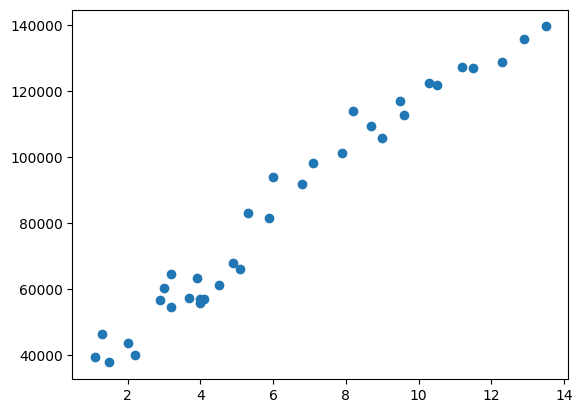

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

In [ ]:
# Define a simple linear model
model = nn.Linear(1, 1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

epoch_list = []
loss_list =[]
epochs = 50000

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 2000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    if (epoch + 1) % 500 == 0:
        epoch_list.append(epoch)
        loss_list.append(loss.item())

Epoch [2000/50000], Loss: 105044792.0000
Epoch [4000/50000], Loss: 61955804.0000
Epoch [6000/50000], Loss: 45376084.0000
Epoch [8000/50000], Loss: 38996636.0000
Epoch [10000/50000], Loss: 36542020.0000
Epoch [12000/50000], Loss: 35597520.0000
Epoch [14000/50000], Loss: 35234104.0000
Epoch [16000/50000], Loss: 35094248.0000
Epoch [18000/50000], Loss: 35040432.0000
Epoch [20000/50000], Loss: 35019720.0000


KeyboardInterrupt: 

In [ ]:
y[:5], y_pred[:5]

(tensor([[39343.],
         [46205.],
         [37731.],
         [43525.],
         [39891.]]),
 tensor([[38462.8125],
         [40209.2539],
         [41955.6953],
         [46321.7969],
         [48068.2344]], grad_fn=<SliceBackward0>))

In [ ]:
from torch import optim

# Define a simple linear model
model = nn.Linear(1, 1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epoch_list = []
loss_list =[]
epochs = 50000

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 2000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    if (epoch + 1) % 500 == 0:
        epoch_list.append(epoch)
        loss_list.append(loss.item())

Epoch [2000/50000], Loss: 8047752704.0000
Epoch [4000/50000], Loss: 8044854784.0000
Epoch [6000/50000], Loss: 8041957888.0000
Epoch [8000/50000], Loss: 8039062528.0000
Epoch [10000/50000], Loss: 8036169216.0000
Epoch [12000/50000], Loss: 8033275392.0000
Epoch [14000/50000], Loss: 8030381568.0000
Epoch [16000/50000], Loss: 8027489792.0000
Epoch [18000/50000], Loss: 8024596480.0000
Epoch [20000/50000], Loss: 8021704704.0000
Epoch [22000/50000], Loss: 8018814464.0000
Epoch [24000/50000], Loss: 8015923712.0000
Epoch [26000/50000], Loss: 8013033472.0000
Epoch [28000/50000], Loss: 8010145280.0000
Epoch [30000/50000], Loss: 8007256064.0000
Epoch [32000/50000], Loss: 8004366848.0000
Epoch [34000/50000], Loss: 8001479168.0000
Epoch [36000/50000], Loss: 7998592000.0000
Epoch [38000/50000], Loss: 7995705856.0000
Epoch [40000/50000], Loss: 7992819200.0000
Epoch [42000/50000], Loss: 7989933056.0000
Epoch [44000/50000], Loss: 7987049472.0000
Epoch [46000/50000], Loss: 7984162816.0000
Epoch [48000/50

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Colab에서 출력 지우기와 위젯 사용을 위한 모듈 임포트
from IPython.display import clear_output, display
import ipywidgets as widgets

# 데이터 생성
x_data = np.arange(0, 31, 1, dtype=np.float32)
y_data = 2 * x_data + 1

torch.manual_seed(99)

# Tensor로 변환
x_tensor = torch.from_numpy(x_data).unsqueeze(1)  # shape: (31, 1)
y_tensor = torch.from_numpy(y_data).unsqueeze(1)  # shape: (31, 1)

# Dataset과 DataLoader 생성
from torch.utils.data import TensorDataset, DataLoader
batch_size = 5  # batch_size 설정
dataset = TensorDataset(x_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 모델 정의
model = nn.Linear(1, 1)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 2000  # epoch 수 설정

# 손실 값을 저장할 리스트 생성
loss_list = [None for i in range(num_epochs)]
epoch_list = [0 for i in range(num_epochs)]

# 버튼과 출력 영역 생성
button = widgets.Button(description="다음 에포크로 진행")
output = widgets.Output()

# 버튼과 출력 영역을 화면에 표시
display(button, output)

# 에포크 초기값 설정
epoch = 0

# 버튼 클릭 시 실행되는 함수 정의
def on_button_clicked(b):
    global epoch  # 전역 변수 epoch 사용
    with output:
        if epoch >= num_epochs:
            print("학습이 완료되었습니다.")
            button.disabled = True  # 버튼 비활성화
            return

        epoch_loss = 0  # 에포크별 손실 누적 변수

        # 한 에포크 동안 학습
        for batch_x, batch_y in dataloader:
            # Forward 연산
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

            # Backward 연산 및 최적화
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # 배치 손실 누적
            epoch_loss += loss.item() * batch_x.size(0)

        # 평균 손실 계산
        avg_loss = epoch_loss / len(dataset)
        loss_list[epoch]=avg_loss
        epoch_list[epoch]=epoch+1

        # 출력 지우기
        clear_output(wait=True)

        # 그래프 그리기
        plt.figure()

        if epoch >= 5:
            print(loss_list[epoch-2:epoch+2])
        else:
            print(loss_list[0:5])
        w, b = list(model.parameters())
        w = w.item()
        b = b.item()
        print(w,b)

        if epoch>0:
            plt.plot(epoch_list[1:], loss_list[1:], 'b-o')

            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'Epoch {epoch+1}/{num_epochs}')
            plt.show()

        epoch += 1

# 버튼 클릭 이벤트에 함수 연결
button.on_click(on_button_clicked)

Button(description='다음 에포크로 진행', style=ButtonStyle())

Output()

<Figure size 640x480 with 0 Axes>